# Librerie e funzioni d'utilità

In [2]:
import os
import wfdb as wf
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import matplotlib.colors
import pandas as pd
import warnings
import shutil
warnings.filterwarnings('ignore')
%matplotlib inline

In [3]:
blu_fiordaliso = "#6495ED"
lilla = "#c8a2c8"
nero = "#000000"
gradient = ["#ffffff", "#dcc4dc","#c8a2c8", "#a787ad", "#93779c", "#735d82", "#6c4675"]
my_cmap1 = matplotlib.colors.LinearSegmentedColormap.from_list("", gradient)

In [4]:
matrix = np.array([[149030, 34],[7442, 12]])
norm = matplotlib.colors.Normalize(matrix.min(), matrix.max())
boundaries = [value for value in matrix.flatten().tolist()]
list.sort(boundaries)
colors = [[norm(boundaries[0]), "#dcc4dc"], 
          [norm(boundaries[1]), "#c8a2c8"], 
          [norm(boundaries[2]), "#93779c"], 
          [norm(boundaries[3]), "#6c4675"]]
my_cmap2 = matplotlib.colors.LinearSegmentedColormap.from_list("", colors)

In [5]:
def remove_and_make_dir(path):
    if os.path.exists(path):
        shutil.rmtree(path)
        os.mkdir(path)
    else:
        os.mkdir(path)

In [6]:
heartbeats_datasets = "heartbeats_datasets.csv"
base_heartbeats_path = ".\\heartbeats\\"
plot_path = ".\\plot\\"

In [7]:
remove_and_make_dir(base_heartbeats_path)
remove_and_make_dir(plot_path)

In [8]:
directory_dataset = ".\\mitdb\\"

In [9]:
# create directory "mitdb" and download dataset
if not os.path.exists(directory_dataset):
    os.mkdir(directory_dataset)
    wfdb.dl_database("mitdb", directory_dataset)

# wf.io.show_ann_classes()
# wf.io.show_ann_labels()

In [10]:
wf.io.show_ann_labels()

    label_store symbol                                    description
0             0                              Not an actual annotation
1             1      N                                    Normal beat
2             2      L                  Left bundle branch block beat
3             3      R                 Right bundle branch block beat
4             4      a                Aberrated atrial premature beat
5             5      V              Premature ventricular contraction
6             6      F          Fusion of ventricular and normal beat
7             7      J              Nodal (junctional) premature beat
8             8      A                   Atrial premature contraction
9             9      S     Premature or ectopic supraventricular beat
10           10      E                        Ventricular escape beat
11           11      j                 Nodal (junctional) escape beat
12           12      /                                     Paced beat
13           13     

# Distribuzione etichette

In [11]:
# extract filename from directory
list_of_file = list(set([x.rsplit('.', 1)[0] for x in os.listdir(directory_dataset)]))
list_of_file.sort()

In [12]:
# key = filename, value = [record(tuple), annotation(array)]
dataset = {}

for filename in list_of_file:
    file = os.path.join(directory_dataset, filename)
    
    # read the file
    record = wf.rdsamp(file)
    annotation = wf.rdann(file, 'atr')
    dataset[filename] = [record, annotation]
    
    # info about the data
    print("File:", file)
    print("Sampling frequency:", record[1].get("fs"))
    print("Data shape:", record[0].shape)
    print("Annotations:", len(annotation.num))
    print("\n")

File: .\mitdb\100
Sampling frequency: 360
Data shape: (650000, 2)
Annotations: 2274


File: .\mitdb\101
Sampling frequency: 360
Data shape: (650000, 2)
Annotations: 1874


File: .\mitdb\102
Sampling frequency: 360
Data shape: (650000, 2)
Annotations: 2192


File: .\mitdb\103
Sampling frequency: 360
Data shape: (650000, 2)
Annotations: 2091


File: .\mitdb\104
Sampling frequency: 360
Data shape: (650000, 2)
Annotations: 2311


File: .\mitdb\105
Sampling frequency: 360
Data shape: (650000, 2)
Annotations: 2691


File: .\mitdb\106
Sampling frequency: 360
Data shape: (650000, 2)
Annotations: 2098


File: .\mitdb\107
Sampling frequency: 360
Data shape: (650000, 2)
Annotations: 2140


File: .\mitdb\108
Sampling frequency: 360
Data shape: (650000, 2)
Annotations: 1824


File: .\mitdb\109
Sampling frequency: 360
Data shape: (650000, 2)
Annotations: 2535


File: .\mitdb\111
Sampling frequency: 360
Data shape: (650000, 2)
Annotations: 2133


File: .\mitdb\112
Sampling frequency: 360
Data shape: 

In [13]:
# distribution of annotation
labels = {}
for record in dataset.values():
    annotypes = np.array(record[1].symbol)
    for label in annotypes:
        if label in labels.keys():
            labels[label] += 1
        else:
            labels[label] = 1
labels = dict(sorted(labels.items(), key=lambda item: item[1], reverse=True))

In [14]:
# plot bar chart esteso
def bar_plot_ex(keys, values, title, path, dim):
    plt.figure(figsize=dim) 
    plt.yscale("log")
    plt.grid(color=nero, linestyle='-', linewidth=0.5, axis="y")
    plt.title(title)
    p = plt.bar(keys, values, width=1, color=lilla, edgecolor=nero, linewidth=0.5, align='center')
    plt.xticks(rotation = 90)
    plt.savefig(plot_path + path, bbox_inches='tight', transparent=True)
    plt.show()

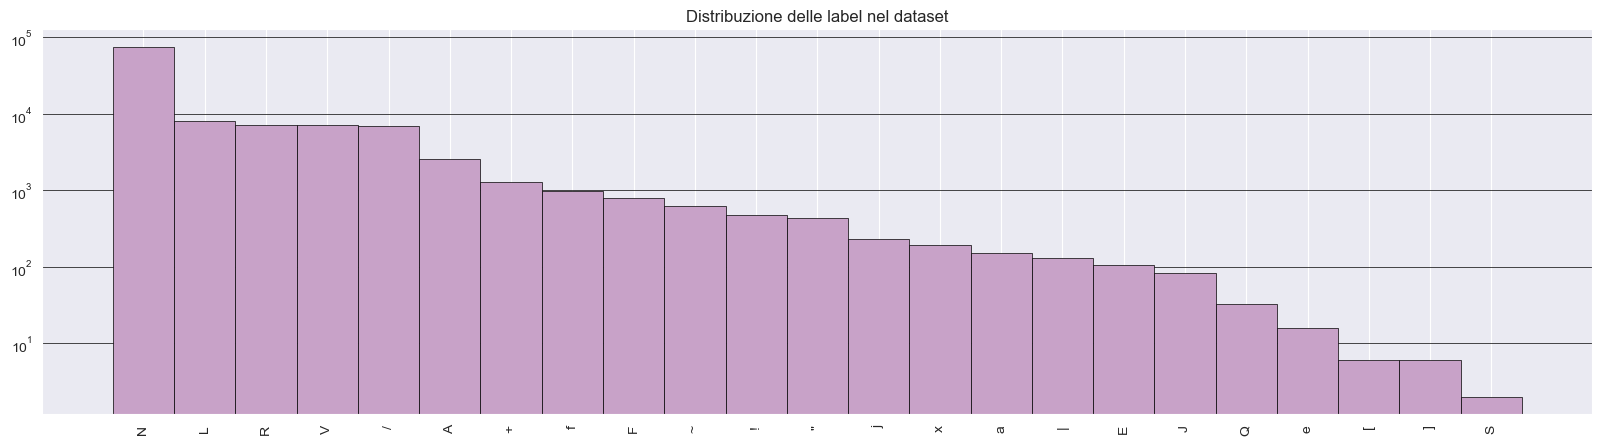

In [15]:
keys = labels.keys()
values = [item for item in labels.values()]
title = "Distribuzione delle label nel dataset"
file_name = "".join(title.lower()).replace(" ", "_")
dim = (20,5)
bar_plot_ex(keys, values, title, file_name, dim)

In [16]:
tmp = {}
for key, record in dataset.items():
    annotypes = np.array(record[1].symbol)
    tmp[key] = dict.fromkeys(labels.keys(), 0)
    for label in annotypes:
        tmp[key][label] = tmp[key][label] + 1

df = pd.DataFrame.from_dict(tmp)
df = df.replace(0, np.nan)
df = df.T

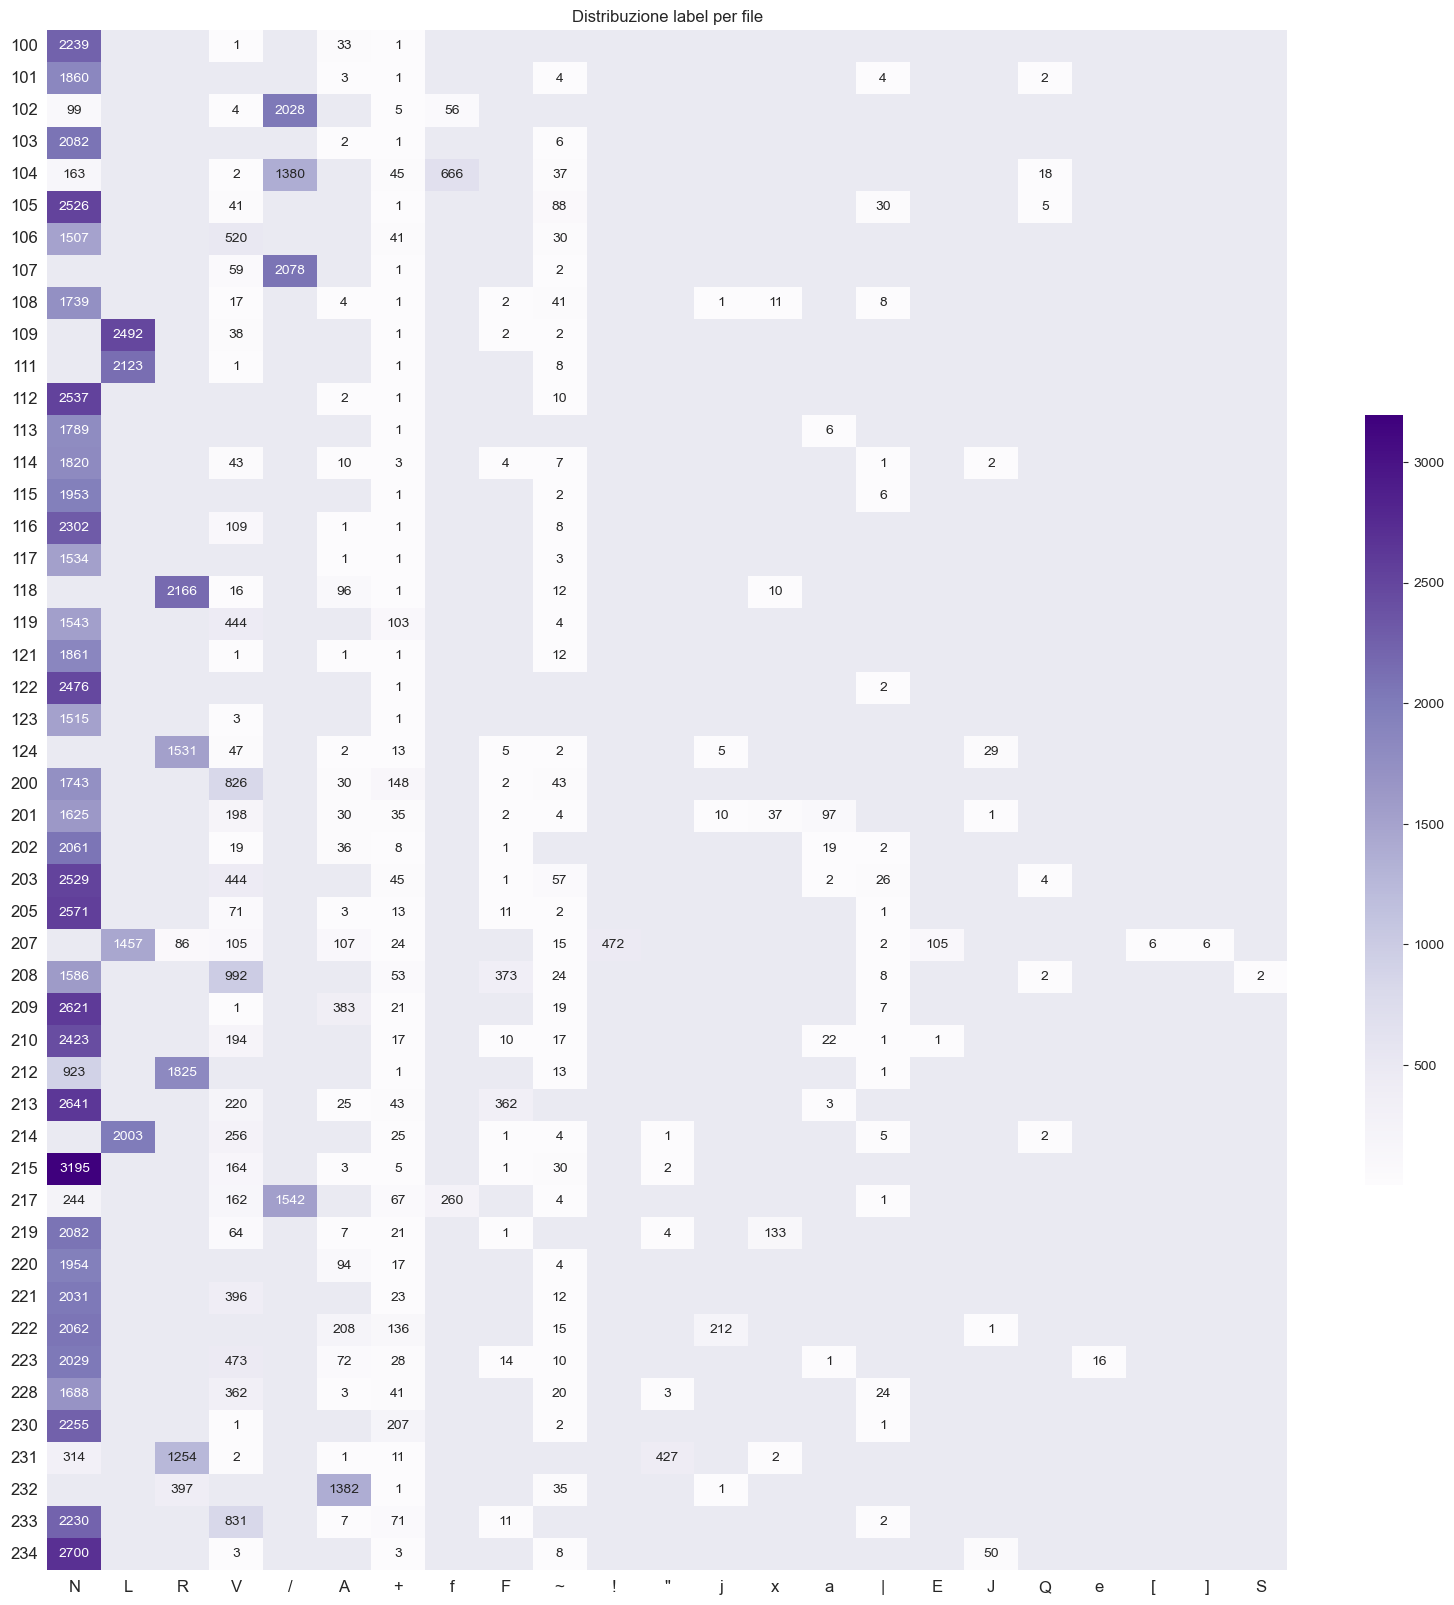

In [17]:
fig, ax = plt.subplots(figsize=(20,20)) 
title = "Distribuzione label per file"
file_name = "".join(title.lower()).replace(" ", "_")
ax.set_title(title)
ax.set_xlabel("Label")
ax.set_ylabel("File")
heatmap = sns.heatmap(df, ax=ax, annot=True, fmt=".0f", cmap="Purples", cbar_kws={"shrink": .5})
a = heatmap.set_yticklabels(heatmap.get_yticklabels(), rotation = 0, fontsize = 12)
b = heatmap.set_xticklabels(heatmap.get_xticklabels(), rotation = 0, fontsize = 12)
fig.savefig(plot_path + file_name, bbox_inches='tight', transparent=True)

# Plot ECG

In [18]:
def plot_ecg(channel, sample_start, sample_size, record, annotation):
    # get data and annotations for the samples selected below
    sample_end = sample_start + sample_size
    signal = record[0][sample_start:sample_end, channel]

    # plot the heart beats
    # time scale is number of readings divided by sampling frequency
    times = (np.arange(sample_size, dtype = 'float') + sample_start) / record[1].get('fs')
    plt.figure(figsize=(20,7))
    plt.plot(times, signal)

    # extract annotations
    where = np.logical_and(annotation.sample >= sample_start, annotation.sample < sample_end)
    annots = annotation.sample[where] - sample_start
    annotypes = np.array(annotation.symbol)
    annotypes = annotypes[where]

    # plot the annotations
    annotimes = times[annots]
    plt.plot(annotimes, np.ones_like(annotimes) * signal.max() * 1.4, 'ro')

    # annotation codes
    for idx, annot in enumerate(annots):
        plt.annotate(annotypes[idx], xy = (times[annot], signal.max() * 1.1))

    plt.xlim([sample_start / record[1].get('fs'), (sample_end / record[1].get('fs'))])
    plt.xlabel('Offset')
    plt.ylabel(record[1].get('sig_name')[channel])
    plt.show()

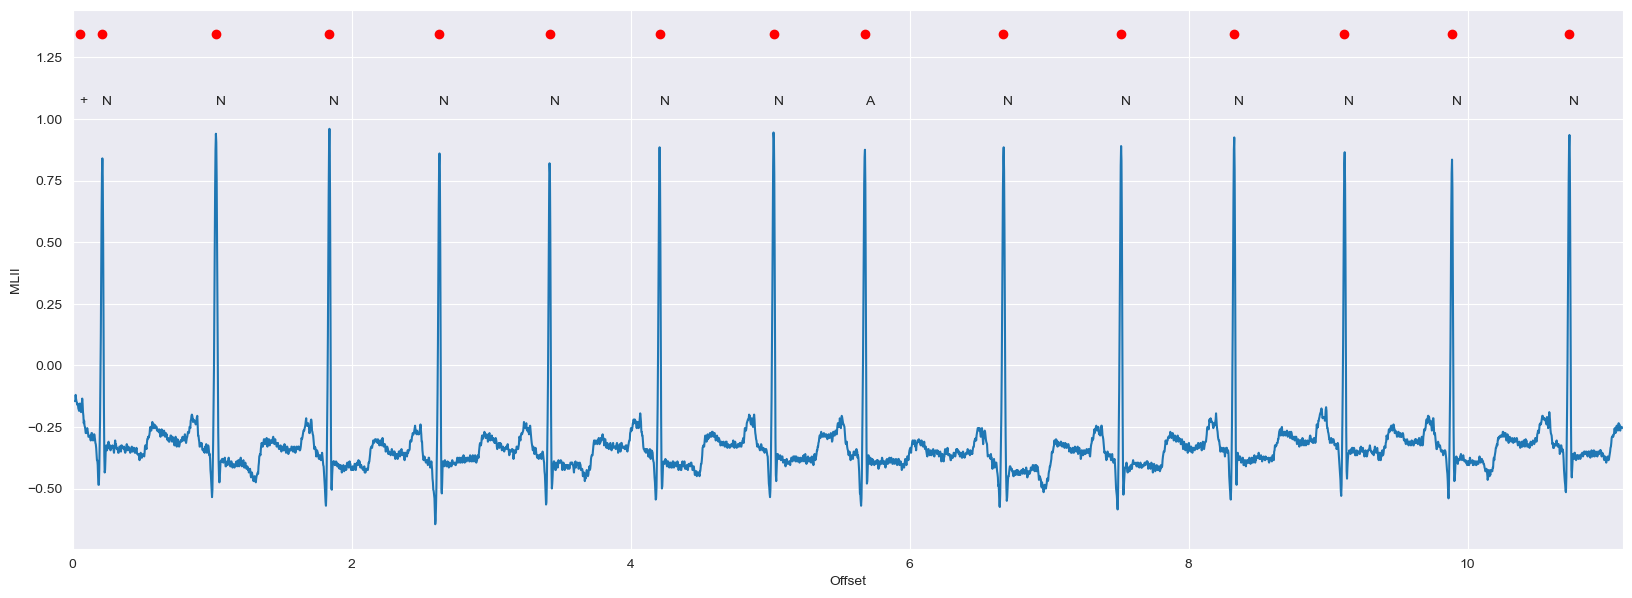

In [19]:
# there are 2 channels -> MLII wave = 0
channel = 0             

# start of the sample in the file
sample_start = 0        

# number of readings (360 per second)
sample_size = 4000      

record = dataset["100"][0]
annotation = dataset["100"][1]

plot_ecg(channel, sample_start, sample_size, record, annotation)

# Creazione dataset di heartbeat

In [20]:
def get_heartbeat(channel, sample_start, sample_size, record, annotation):

    sample_end = sample_start + sample_size
    signal = record[0][sample_start:sample_end, channel]

    times = (np.arange(sample_size, dtype = 'float') + sample_start) / record[1].get('fs')

    where = np.logical_and(annotation.sample >= sample_start, annotation.sample < sample_end)
    annots = annotation.sample[where] - sample_start
    annotypes = np.array(annotation.symbol)
    annotypes = annotypes[where]

    annotimes = times[annots]
    
    return (signal, times, annotypes, annotimes, annots)    

In [21]:
def plot_heartbeat(signal, times, annotypes, annotimes, annots):

    plt.figure(figsize=(20,7))
    plt.plot(times, signal)
    plt.plot(annotimes, np.ones_like(annotimes) * signal.max() * 1.4, 'ro')

    for idx, annot in enumerate(annots):
        plt.annotate(annotypes[idx], xy = (times[annot], signal.max() * 1.1))

    plt.xlabel('Offset')
    plt.ylabel(record[1].get('sig_name')[channel])
    plt.show()

In [22]:
channel = 0             
heartbeat_size = 300 
ds = []
for key in dataset.keys():
    record = dataset[key][0]
    annotation = dataset[key][1]
    for pos_of_annotation in annotation.sample:
        heartbeat_start = 0 if (pos_of_annotation - 149) < 0 else pos_of_annotation - 149
        ds.append(get_heartbeat(channel, heartbeat_start, heartbeat_size, record, annotation))

In [23]:
df = pd.DataFrame(ds, columns=["signal", "times", "annotypes", "annotimes", "annots"])
# plot_heartbeat(df["signal"][0], df["times"][0],df["annotypes"][0], df["annotimes"][0], df["annots"][0])
print("Numero record:", len(df))
display(df.head())

Numero record: 112647


,signal,times,annotypes,annotimes,annots
0,"[-0.145, -0.145, -0.145, -0.145, -0.145, -0.14...","[0.0, 0.002777777777777778, 0.0055555555555555...","[+, N]","[0.05, 0.21388888888888888]","[18, 77]"
1,"[-0.145, -0.145, -0.145, -0.145, -0.145, -0.14...","[0.0, 0.002777777777777778, 0.0055555555555555...","[+, N]","[0.05, 0.21388888888888888]","[18, 77]"
2,"[-0.265, -0.27, -0.265, -0.26, -0.275, -0.28, ...","[0.6138888888888889, 0.6166666666666667, 0.619...",[N],[1.0277777777777777],[149]
3,"[-0.305, -0.315, -0.315, -0.31, -0.295, -0.29,...","[1.425, 1.4277777777777778, 1.4305555555555556...",[N],[1.8388888888888888],[149]
4,"[-0.325, -0.305, -0.31, -0.295, -0.31, -0.325,...","[2.213888888888889, 2.216666666666667, 2.21944...",[N],[2.6277777777777778],[149]


In [24]:
# delete heartbeat with more one annotation and make dataset for neural network
df1 = df[["signal", "annotypes"]]
df1 = df1[df1['annotypes'].str.len() == 1]
df1["annotypes"] = df1["annotypes"].apply(lambda x: x[0])
# df1.to_csv(base_heartbeats_path + heartbeats_datasets, index=False)
print("Numero record:", len(df1))
display(df1.head())

Numero record: 104249


,signal,annotypes
2,"[-0.265, -0.27, -0.265, -0.26, -0.275, -0.28, ...",N
3,"[-0.305, -0.315, -0.315, -0.31, -0.295, -0.29,...",N
4,"[-0.325, -0.305, -0.31, -0.295, -0.31, -0.325,...",N
5,"[-0.285, -0.3, -0.305, -0.3, -0.295, -0.3, -0....",N
6,"[-0.3, -0.285, -0.28, -0.29, -0.295, -0.305, -...",N


In [56]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Input, Dense, concatenate
from tensorflow.keras.models import Model
from tensorflow.keras.utils import plot_model

input_tot = Input(shape=(300, 1), name ="Input_tot")

# Pipeline 1
branch1_1 = keras.layers.Conv1D(filters=8, kernel_size=4, activation='relu', name ="branch1_1")(input_tot)
branch1_2 = keras.layers.MaxPooling1D(pool_size=2, strides=2, name ="branch1_2")(branch1_1)
branch1_3 = keras.layers.Conv1D(filters=24, kernel_size=6, activation='relu', name ="branch1_3")(branch1_2)
branch1_4 = keras.layers.MaxPooling1D(pool_size=2, strides=2, name ="branch1_4")(branch1_3)

# Pipeline 2
branch2_1 = keras.layers.Conv1D(filters=8, kernel_size=6, activation='relu', name ="branch2_1")(input_tot)
branch2_2 = keras.layers.MaxPooling1D(pool_size=2, strides=2, name ="branch2_2")(branch2_1)
branch2_3 = keras.layers.Conv1D(filters=24, kernel_size=8, activation='relu', name ="branch2_3")(branch2_2)
branch2_4 = keras.layers.MaxPooling1D(pool_size=2, strides=2, name ="branch2_4")(branch2_3)

# Pipeline 3
branch3_1 = keras.layers.Conv1D(filters=8, kernel_size=8, activation='relu', name ="branch3_1")(input_tot)
branch3_2 = keras.layers.MaxPooling1D(pool_size=2, strides=2, name ="branch3_2")(branch3_1)
branch3_3 = keras.layers.Conv1D(filters=24, kernel_size=10, activation='relu', name ="branch3_3")(branch3_2)
branch3_4 = keras.layers.MaxPooling1D(pool_size=2, strides=2, name ="branch3_4")(branch3_3)

#Merging tre pipeline
branch_concatenate = concatenate([branch1_4,branch2_4,branch3_4], axis=1, name="concatenated_layer")

#Final Layer
dense1 = Dense(256, activation = "sigmoid", name = "dense1")(branch_concatenate)
dense2 = Dense(32, activation = "sigmoid", name = "dense2")(dense1)
output_layer = Dense(4, activation = "sigmoid", name = "output_layer")(dense2)

#Model Definition
model = Model(inputs=[input_tot],outputs=[output_layer], name = "merged model")

#Model Details
model.summary()
keras.utils.plot_model(model, "output/architecture.png", show_shapes=True)

ValueError: Please provide to Input a `shape` or a `tensor` or a `type_spec` argument. Note that `shape` does not include the batch dimension.

In [73]:
df2 = df1[(df1['annotypes'] == 'N') | (df1['annotypes'] == 'L')]
print(len(df2))
print(type(df2))

print(type(df2['signal']))
print(len(list(df2['signal'])[0]))
count = 0
for i in list(df2['signal']):
    if len(i) != 300:
        count = count+1
print(count)

79577
<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.series.Series'>
300
23


In [60]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(list(df2['signal']), list(df2['annotypes']), test_size=0.2, random_state=42)
print(len(X_train))
print(type(X_train[0]))
print(len(X_test))
print(len(y_train))
print(len(y_test))


63661
<class 'numpy.ndarray'>
15916
63661
15916


In [52]:
train_dataset = tf.data.Dataset.from_tensor_slices((X_train, y_train))
test_dataset = tf.data.Dataset.from_tensor_slices((X_test, y_test))

ValueError: Can't convert non-rectangular Python sequence to Tensor.

In [67]:
X_train = np.array(X_train)
print(type(X_train))

a = tf.convert_to_tensor(X_train, dtype=float, name='prova')


<class 'numpy.ndarray'>


ValueError: setting an array element with a sequence.

In [44]:
type(X_train[0])

numpy.ndarray

In [45]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.fit(x=X_train, y=y_train, epochs=3)

test_error_rate = model.evaluate(X_test, y_test, verbose=0)

IndexError: tuple index out of range